In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('heart.csv')

In [49]:
data.shape

(918, 12)

In [50]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

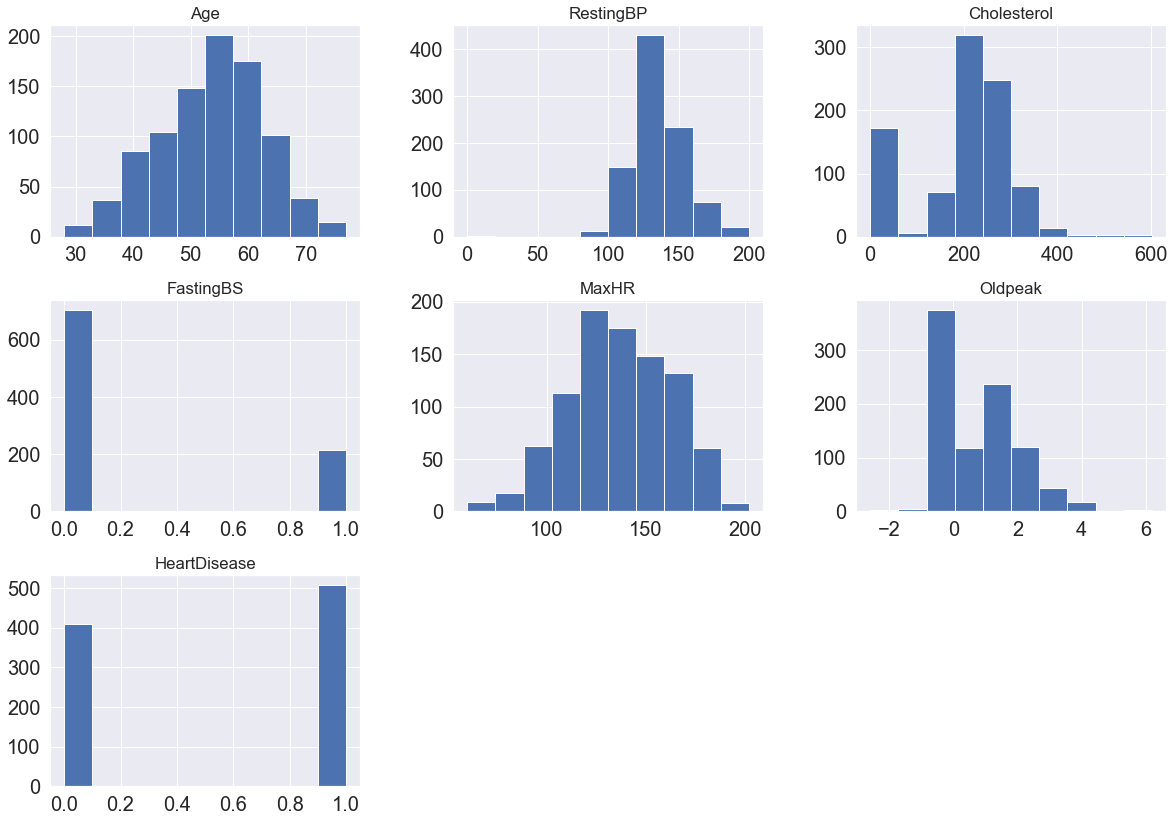

In [52]:
data.hist(figsize=(20,14),    xlabelsize = 20, ylabelsize = 20)

In [53]:
import seaborn as sns

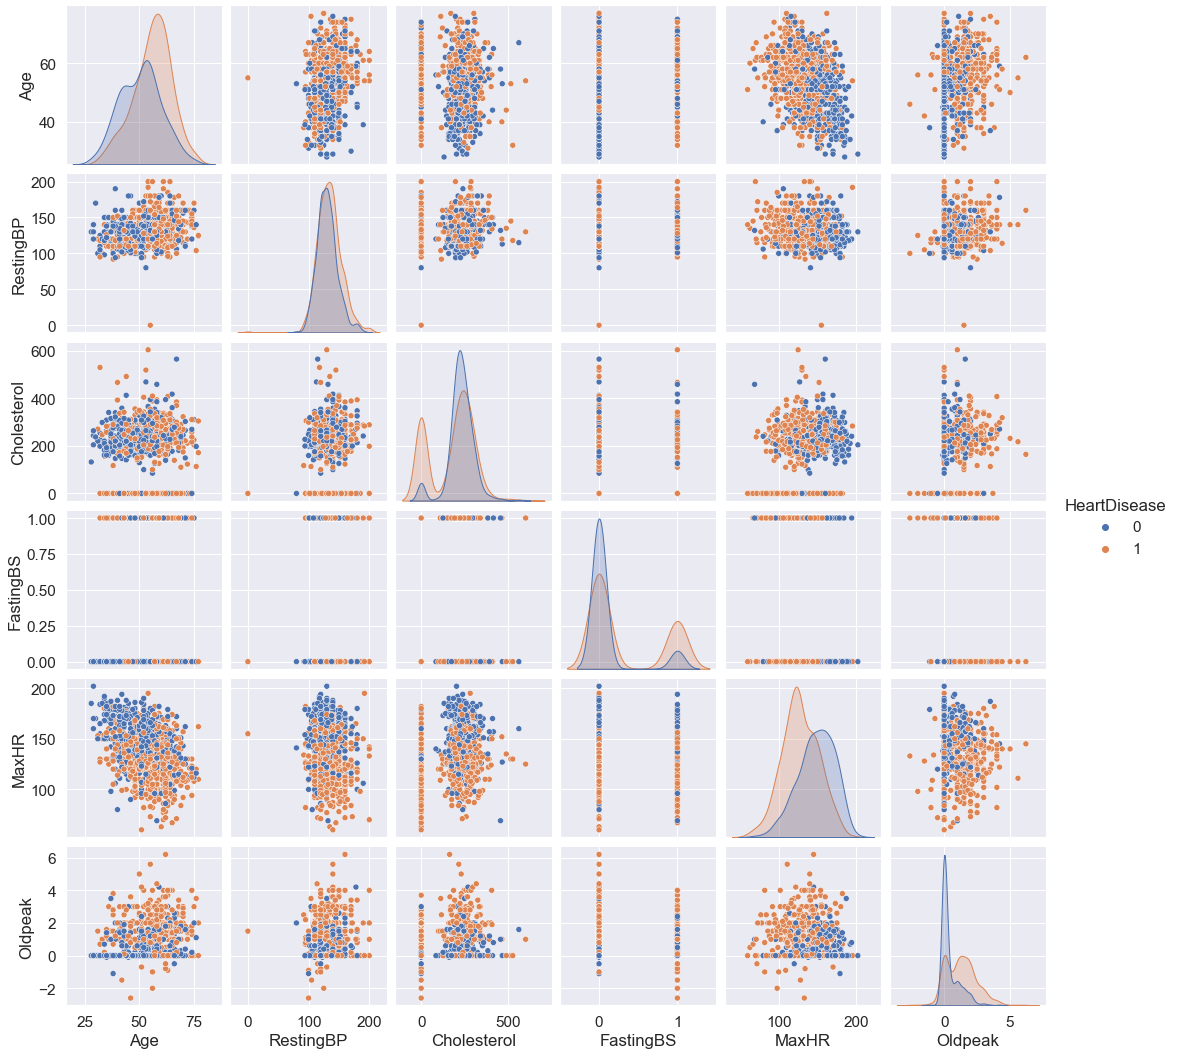

In [54]:
sns.pairplot(data, hue="HeartDisease")
sns.set(font_scale=1.4)

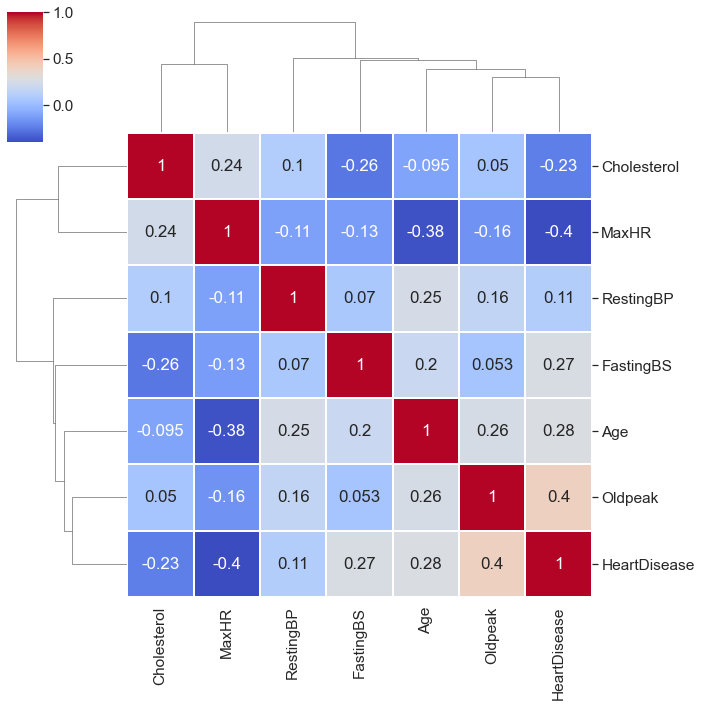

In [55]:
sns.clustermap(data.corr(),annot=True,cmap='coolwarm',linecolor='white',linewidths=1)
sns.set(font_scale=1.4)

<AxesSubplot:>

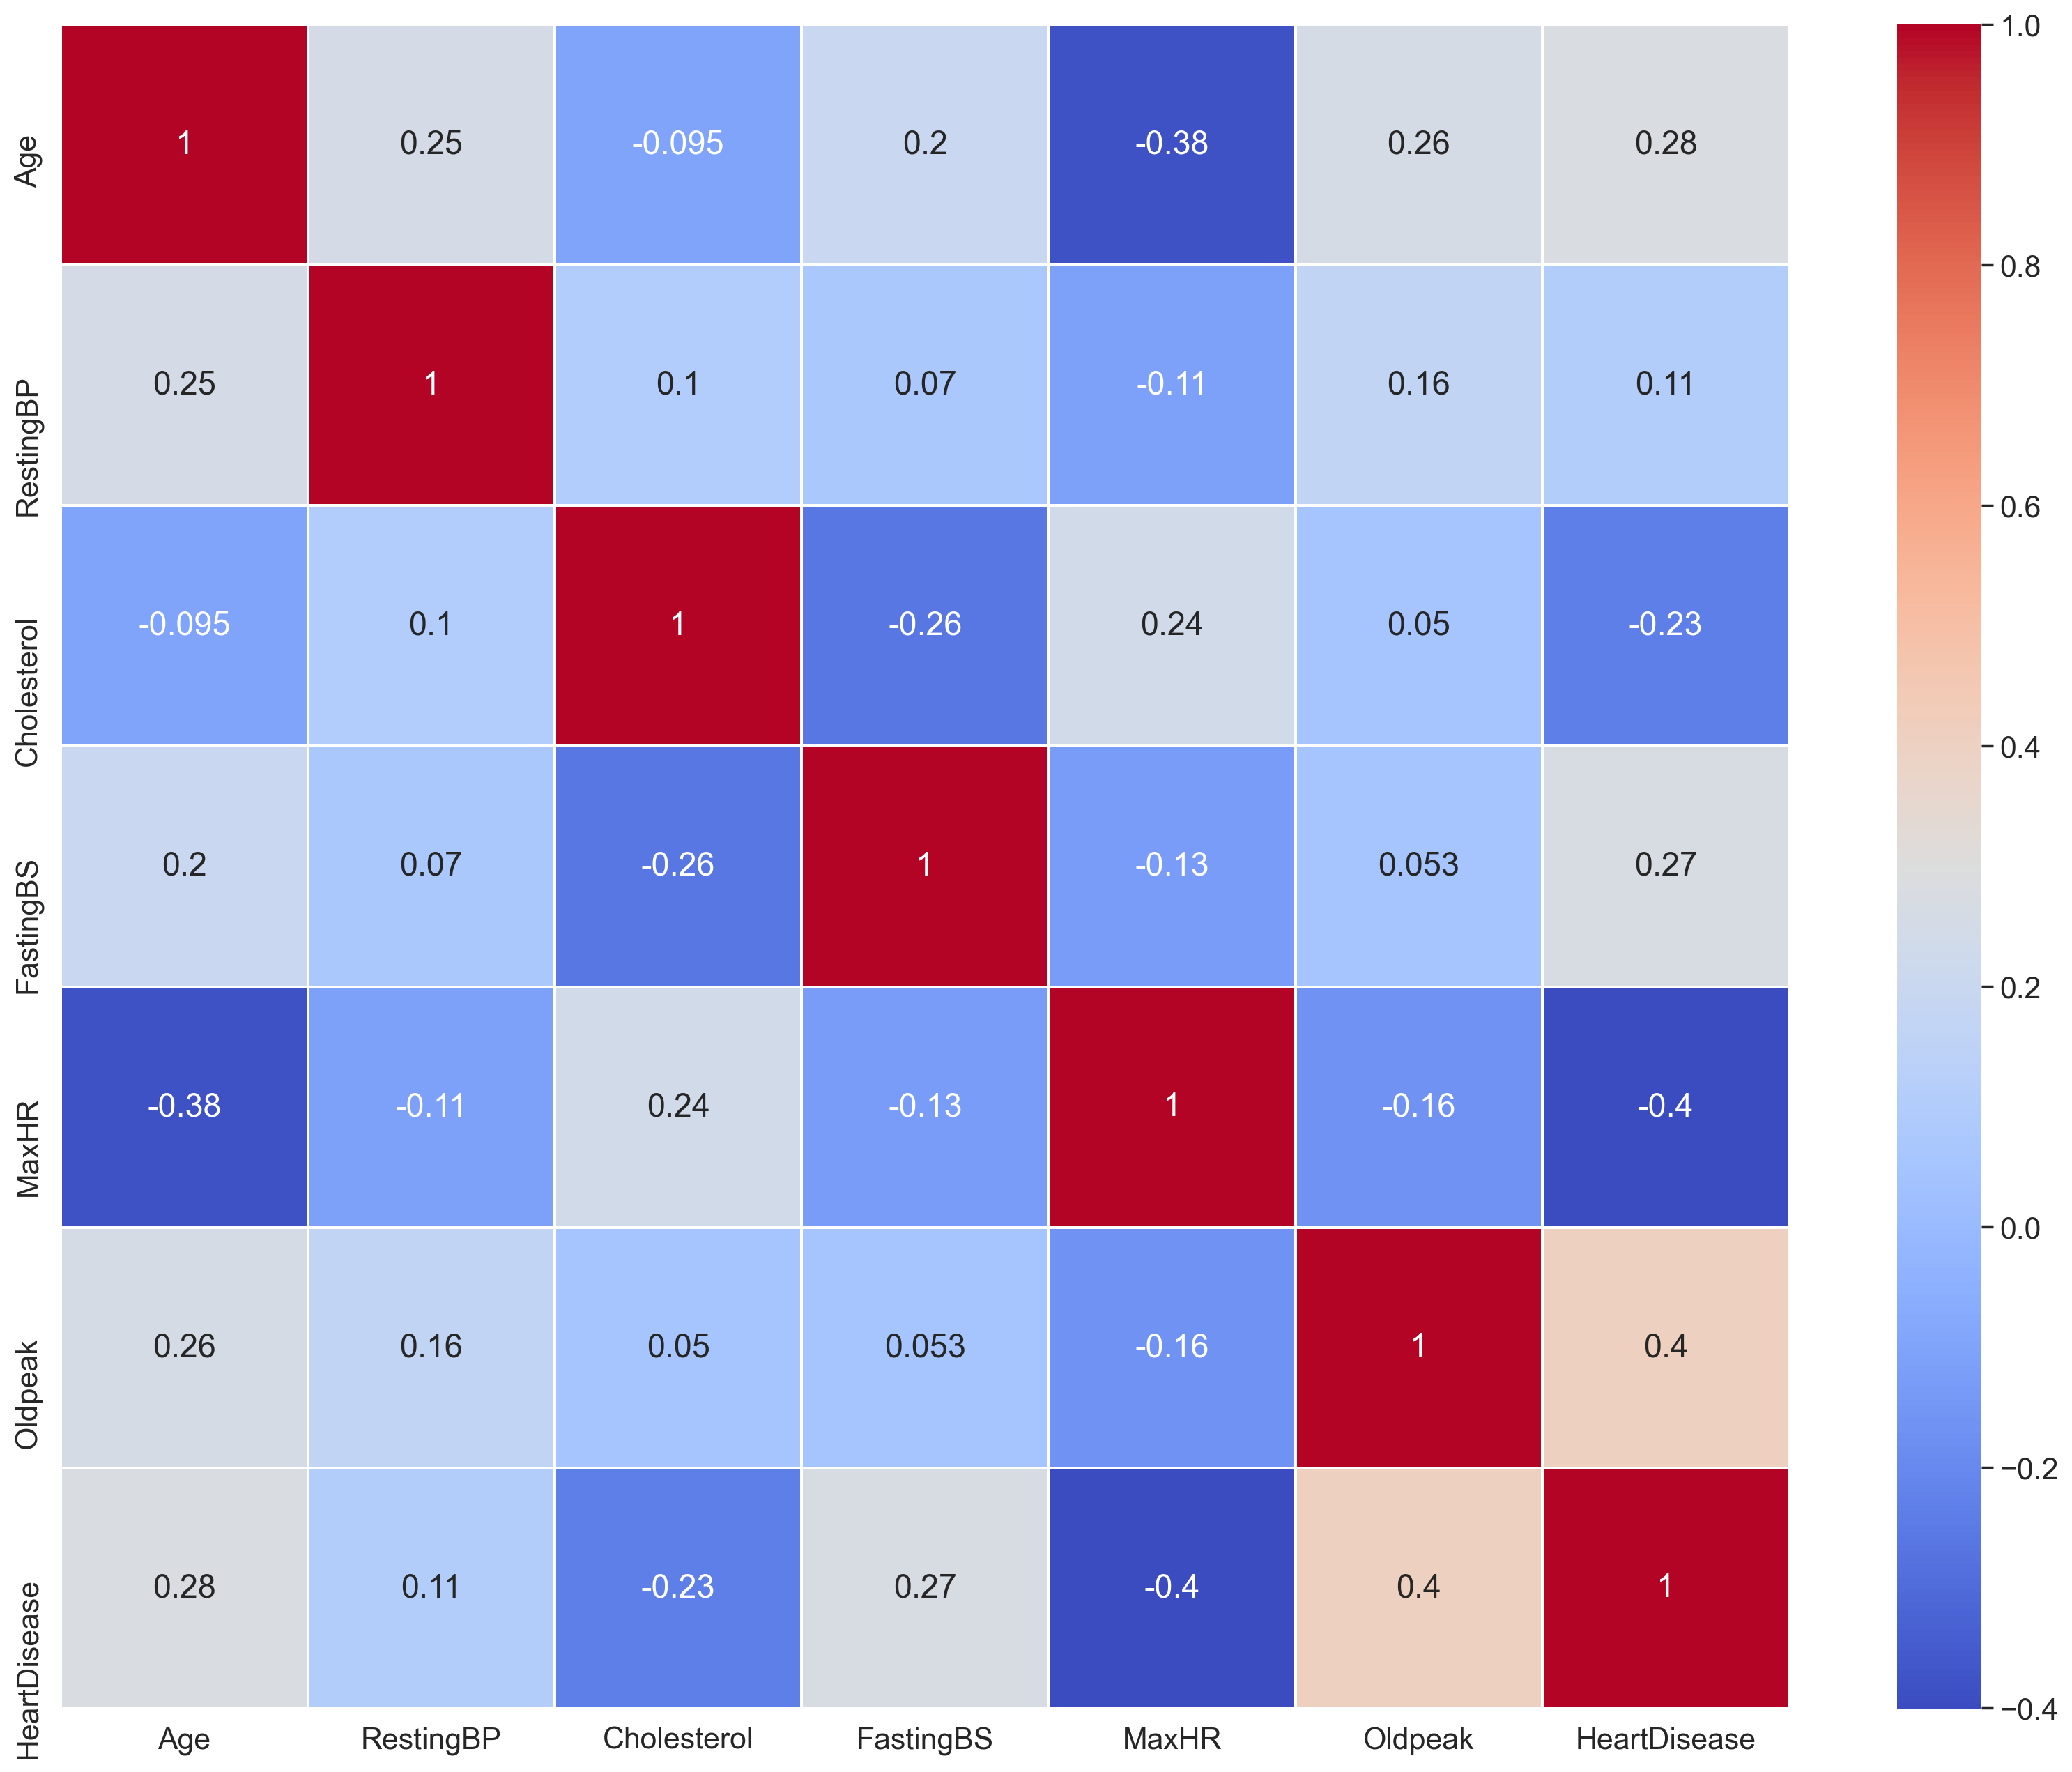

In [56]:
plt.figure(figsize=(20,16),dpi=200)  #correlation heatmap development
sns.set(font_scale=1.4)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linecolor='white',linewidths=1)


Text(0.5, 1.0, 'Correlation respect to Heart Disease patients')

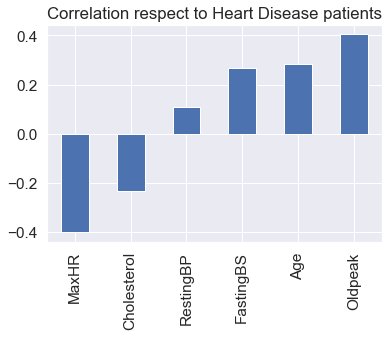

In [57]:
data.corr()['HeartDisease'][:-1].sort_values().plot(kind = 'bar') #plot the correlation as a bar chart
plt.title('Correlation respect to Heart Disease patients')

<Figure size 720x1080 with 0 Axes>

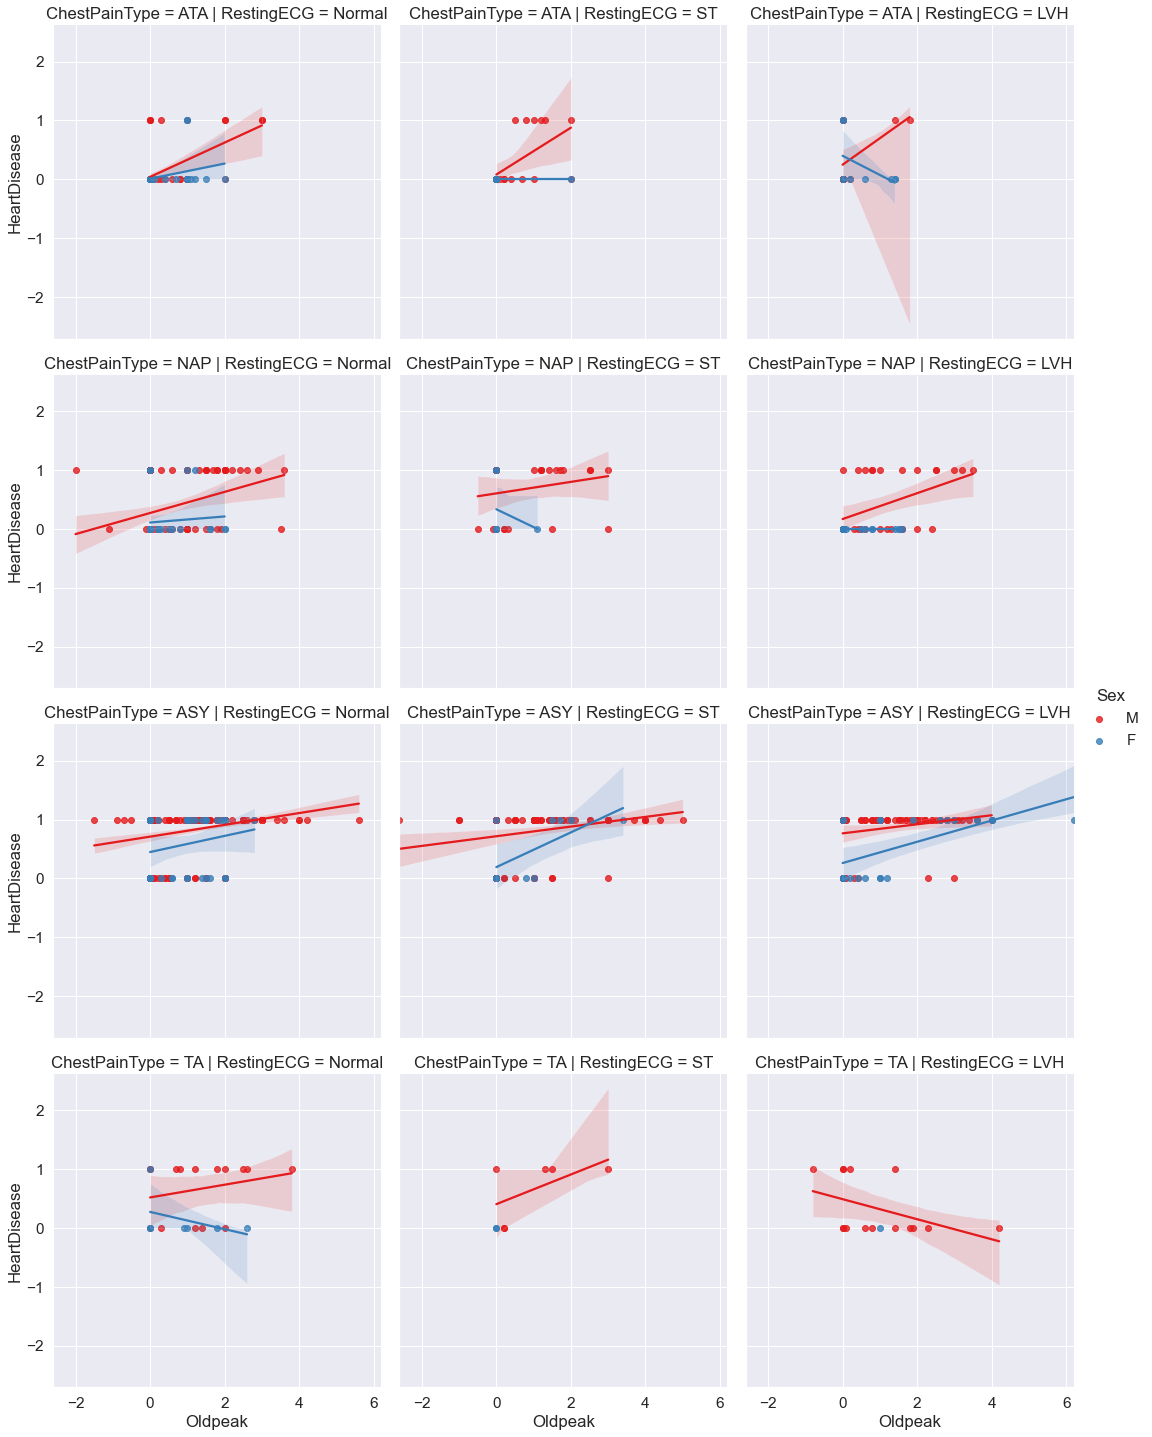

In [58]:
plt.figure(figsize=(10,15))  #fetures plot to analyze the data behaviour

sns.lmplot(y='HeartDisease',x='Oldpeak',data=data, hue='Sex',
          col='RestingECG',palette='Set1',row='ChestPainType')

Text(0, 0.5, 'frequency')

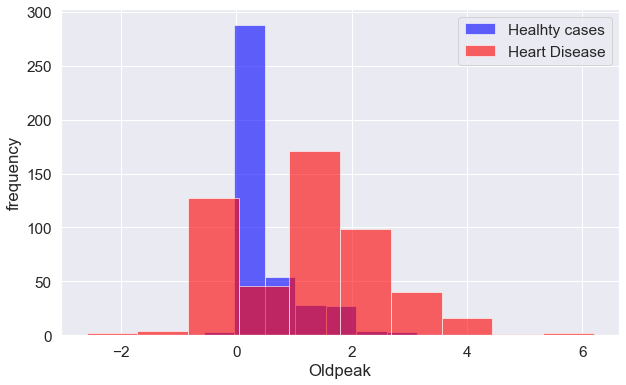

In [59]:
plt.figure(figsize=(10,6))    #histogram analuze of average walking speed
data[data['HeartDisease']==0]['Oldpeak'].hist(bins = 10,color='blue',label = 'Healhty cases',alpha= 0.6)
data[data['HeartDisease']==1]['Oldpeak'].hist(bins = 10,color='red',label = 'Heart Disease',alpha= 0.6)
plt.legend()
plt.xlabel('Oldpeak')
plt.ylabel('frequency')

C:\Users\musthaq ahamed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\musthaq ahamed\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


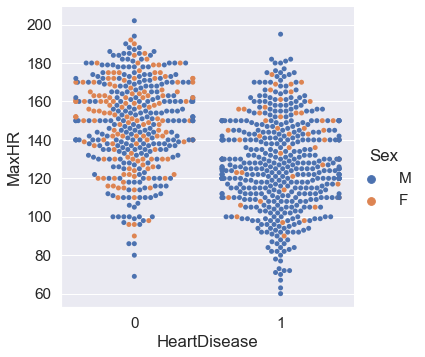

In [60]:
sns.catplot(data=data, kind="swarm", y="MaxHR", x="HeartDisease", hue="Sex")

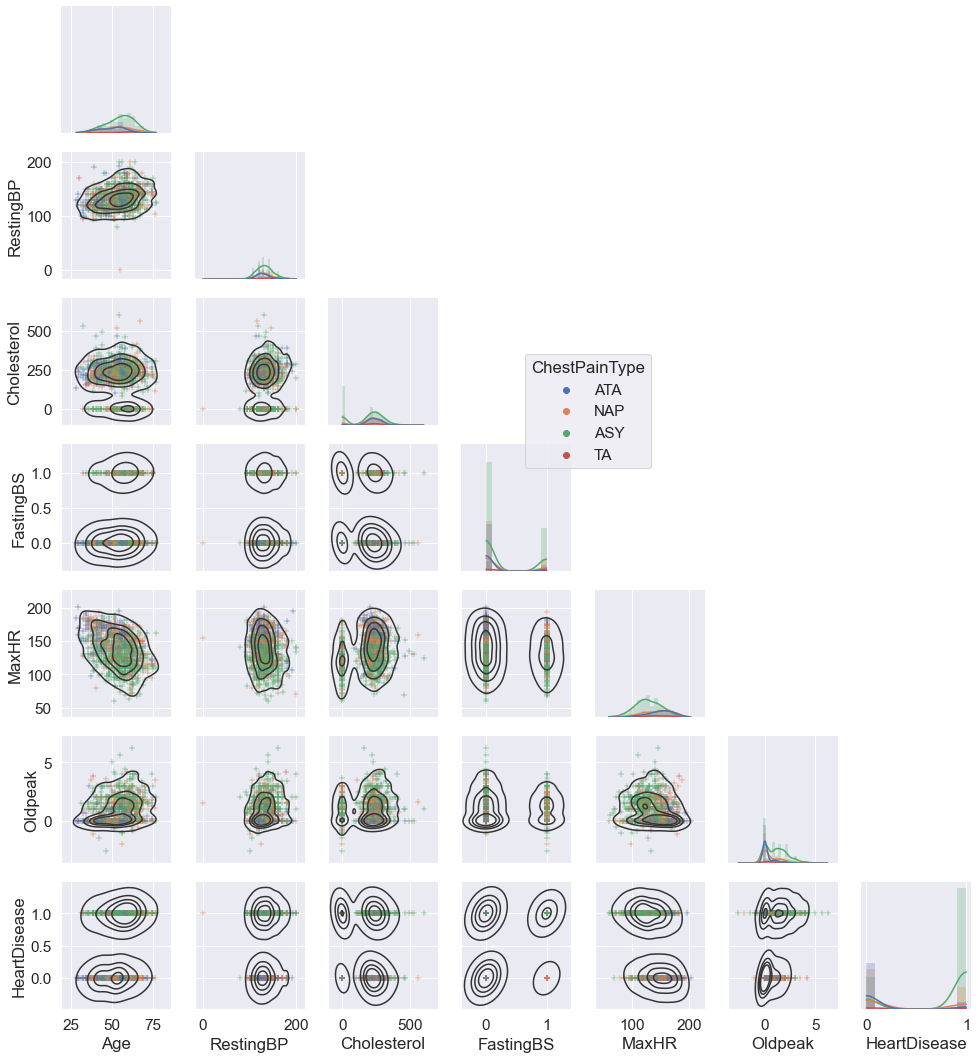

In [61]:
g = sns.PairGrid(data, hue="ChestPainType", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
g.fig.set_size_inches(15,15)

In [62]:
sex = pd.get_dummies(data['Sex'],drop_first=True)   #gender is converted into numerical values
chestpaintype = pd.get_dummies(data['ChestPainType'],drop_first=True)
restingecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
stslope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [63]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)  

In [64]:
data = pd.concat([data,sex,chestpaintype,restingecg,ExerciseAngina,stslope],axis=1)

In [65]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [66]:
column_names = ['Age','M','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','Normal','ST','MaxHR','Y','Oldpeak','Flat','Up','HeartDisease']
data = data.reindex(columns=column_names)

In [67]:
data

,Age,M,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,Normal,ST,MaxHR,Y,Oldpeak,Flat,Up,HeartDisease
0,40,1,1,0,0,140,289,0,1,0,172,0,0.0,0,1,0
1,49,0,0,1,0,160,180,0,1,0,156,0,1.0,1,0,1
2,37,1,1,0,0,130,283,0,0,1,98,0,0.0,0,1,0
3,48,0,0,0,0,138,214,0,1,0,108,1,1.5,1,0,1
4,54,1,0,1,0,150,195,0,1,0,122,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,0,1,110,264,0,1,0,132,0,1.2,1,0,1
914,68,1,0,0,0,144,193,1,1,0,141,0,3.4,1,0,1
915,57,1,0,0,0,130,131,0,1,0,115,1,1.2,1,0,1
916,57,0,1,0,0,130,236,0,0,0,174,0,0.0,1,0,1


In [68]:
X = data.drop(['HeartDisease'], axis = 1) #define the features as X 

In [69]:
y = data['HeartDisease'] #define the label as Y

In [70]:
from sklearn.model_selection import train_test_split  #import the data selection libr

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

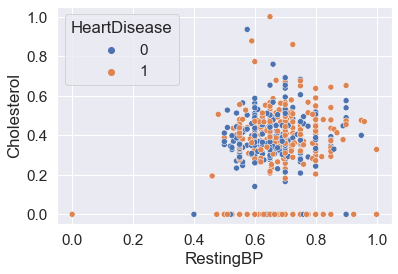

In [72]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['RestingBP'], y =X_train_scaled ['Cholesterol'],hue = 'HeartDisease', data = data) #viasualize the particular faetures after

In [73]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  #import tensorflow and keras libraries
from tensorflow.keras.layers import Dense,Dropout  #import dropout function

In [75]:
tf.random.set_seed(42)
model = Sequential() #define the model as sequential

model.add(Dense(16, input_shape=(15,),activation = 'relu')) #dense layer input
model.add(Dropout(0.2)) #dropout unit

model.add(Dense(16,activation = 'relu'))  #dense layer hidden unit
model.add(Dropout(0.2))  #dropout unit

model.add(Dense(8,activation = 'relu'))  #dense layer hidden unit
model.add(Dropout(0.2))  #dropout unit

model.add(Dense(8,activation = 'relu')) #dense layer hidden unit
model.add(Dropout(0.2))  #dropout unit

#Binary calssification  
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy']) #train the model

In [76]:
model.summary()  #develop model structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                

In [77]:
import pydot #import the pydot library

In [78]:
import graphviz  #import the graphviz library

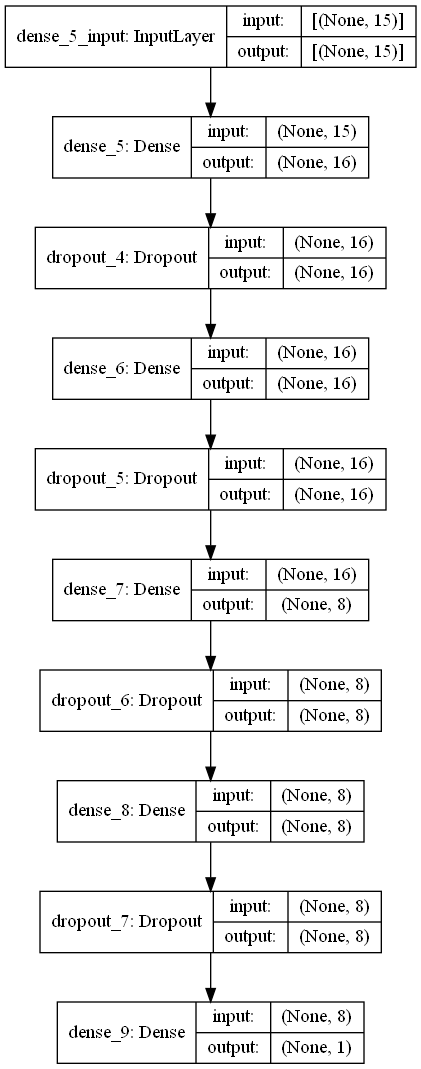

In [79]:
from tensorflow.keras.utils import plot_model #plotting the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping #import the early stopping an

In [81]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)  #define the parameters of ear

In [82]:
#TensorBoard
import datetime

# TensorBoard---Clear any logs from previous runs
!rm -rf ./logs/ 

#TensorBoard
from keras.callbacks import TensorBoard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [83]:
#TensorBoard--last word tensorboard_callback is used to tensorboard
model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test),callbacks=[early_stop,tensorboard_callback])

Epoch 1/50
23/23 [==============================] - 2s 44ms/step - loss: 0.6922 - accuracy: 0.5123 - val_loss: 0.6850 - val_accuracy: 0.6087
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5790 - val_loss: 0.6660 - val_accuracy: 0.6685
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6049 - val_loss: 0.6425 - val_accuracy: 0.7989
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6553 - val_loss: 0.5905 - val_accuracy: 0.8696
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6676 - val_loss: 0.5244 - val_accuracy: 0.8913
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5745 - accuracy: 0.7289 - val_loss: 0.4478 - val_accuracy: 0.9130
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7357 - val_loss: 0.3848 - val_accuracy: 0.9076
Epoch 8/50
23/23 [=

In [84]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15092), started 2:35:10 ago. (Use '!kill 15092' to kill it.)

In [85]:
model.metrics_names #grasp the loss values with time promptly

['loss', 'accuracy']

In [86]:
mat = pd.DataFrame(model.history.history)

<AxesSubplot:>

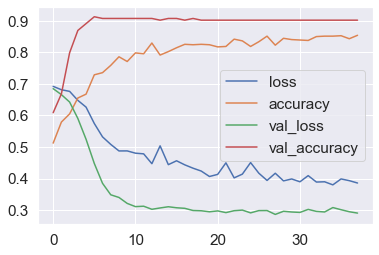

In [87]:
mat.plot() #plot the loss

In [88]:
print(model.metrics_names)
print(model.evaluate(X_test_scaled,y_test,verbose=0))

['loss', 'accuracy']
[0.29033976793289185, 0.9021739363670349]


In [89]:
from sklearn.metrics import classification_report,confusion_matrix #import the performanc

In [90]:
predictions = model.predict_classes(X_test_scaled) #test the model

C:\Users\musthaq ahamed\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [91]:
print(classification_report(y_test,predictions)) #print the performance of the algorithm
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        73
           1       0.93      0.90      0.92       111

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

[[ 66   7]
 [ 11 100]]


Text(116.5, 0.5, 'True Class')

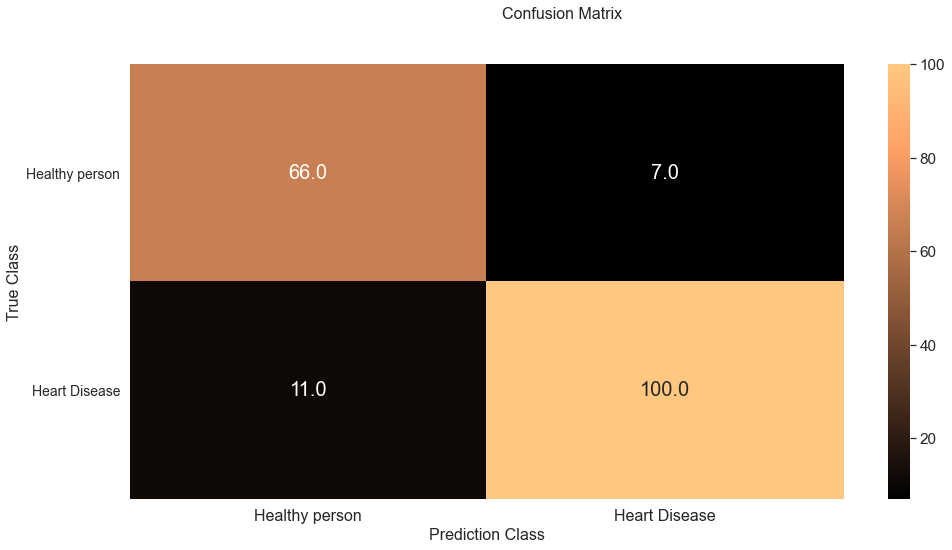

In [92]:
fig=plt.figure(figsize=(16,8))
xticklabel=['Healthy person','Heart Disease']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 20})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=16)
plt.xlabel("Prediction Class",fontsize=16)
plt.ylabel("True Class",fontsize=16)

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,model.predict_classes(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled))

C:\Users\musthaq ahamed\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\musthaq ahamed\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


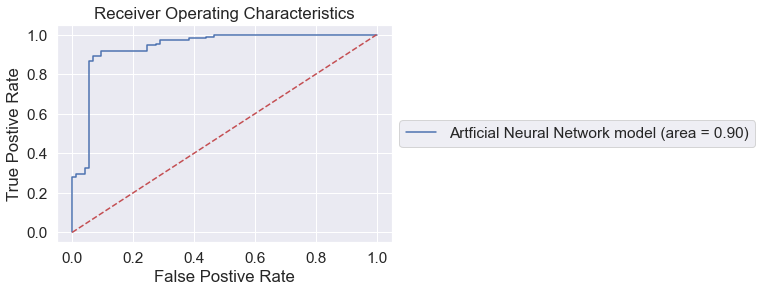

In [99]:
plt.figure()
plt.plot(fpr,tpr,label='Artficial Neural Network model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()